In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

In [2]:
shp_cons = gpd.read_file('Raw Air Pollution Data/json_shapefile.shp')

In [3]:
pm10_2019 = pd.read_csv('Structured Data/avg_pm10_2019.csv')
pm10_2017 = pd.read_csv('Structured Data/avg_pm10_2017.csv')
pm10_2015 = pd.read_csv('Structured Data/avg_pm10_2015.csv')
pm10_2010 = pd.read_csv('Structured Data/avg_pm10_2010.csv')

pm25_2019 = pd.read_csv('Structured Data/avg_pm2.5_2019.csv')
pm25_2017 = pd.read_csv('Structured Data/avg_pm2.5_2017.csv')
pm25_2015 = pd.read_csv('Structured Data/avg_pm2.5_2015.csv')
pm25_2010 = pd.read_csv('Structured Data/avg_pm2.5_2010.csv')

oz_2019 = pd.read_csv('Structured Data/avg_oz_2019.csv')
oz_2017 = pd.read_csv('Structured Data/avg_oz_2017.csv')
oz_2015 = pd.read_csv('Structured Data/avg_oz_2015.csv')
oz_2010 = pd.read_csv('Structured Data/avg_oz_2010.csv')

green2019 = pd.read_csv('Maps/green2019.csv')
green2017 = pd.read_csv('Maps/green2017.csv')
green2015 = pd.read_csv('Maps/green2015.csv')
green2010 = pd.read_csv('Maps/green2010.csv')



In [4]:
merged_df_pollution_pm10 = pd.concat([pm10_2019, pm10_2017, pm10_2015, pm10_2010])
merged_df_pollution_pm25 = pd.concat([pm25_2019, pm25_2017, pm25_2015, pm25_2010])
merged_df_pollution_oz = pd.concat([oz_2019, oz_2017, oz_2015, oz_2010])

pm10_averages = merged_df_pollution_pm10.groupby('pcn20cd')['avg_value'].mean().reset_index()
pm25_averages = merged_df_pollution_pm25.groupby('pcn20cd')['avg_value'].mean().reset_index()
oz_averages = merged_df_pollution_oz.groupby('pcn20cd')['avg_value'].mean().reset_index()



In [6]:
merged_df_vote = pd.concat([green2019, green2017, green2015, green2010])
vote_averages = merged_df_vote.groupby('id')['voteShare'].mean().reset_index()
vote_averages = vote_averages.rename(columns={'id': 'pcn20cd'})

<AxesSubplot: >

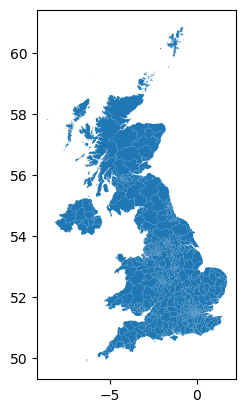

In [7]:
shp_cons.plot()


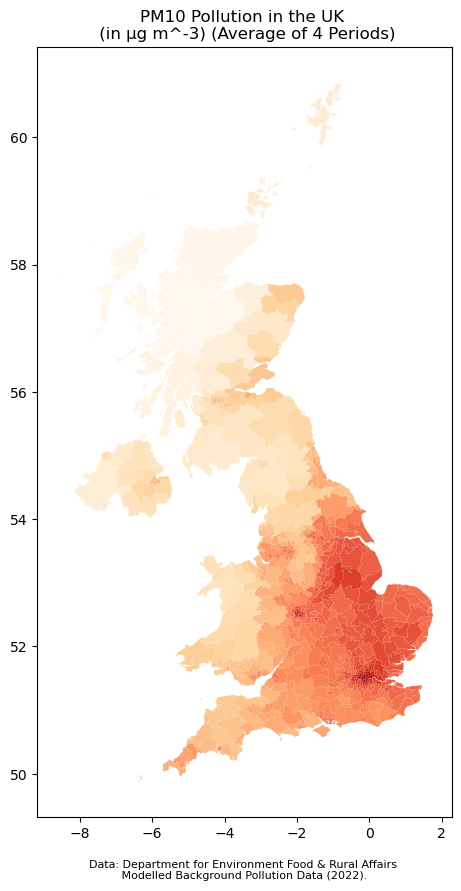

In [21]:
pollution_map_pm10_avg = shp_cons.merge(pm10_averages, on='pcn20cd')

# Plot the joined data with the variable of interest as the fill color
pollution_map_pm10_avg.plot(column='avg_value', cmap='OrRd')

# Add title and axis labels
plt.title('PM10 Pollution in the UK \n (in µg m^-3) (Average of 4 Periods)')


# Add bottom text
plt.text(0.5, -0.08, 'Data: Department for Environment Food & Rural Affairs \n Modelled Background Pollution Data (2022). ', ha='center', fontsize=8,transform=plt.gca().transAxes)
plt.rcParams['figure.dpi'] = 100

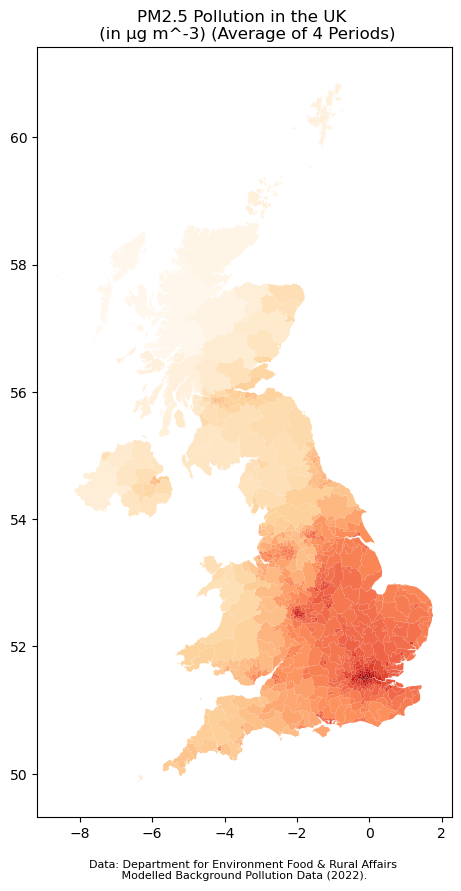

In [22]:
pollution_map_pm25_avg = shp_cons.merge(pm25_averages, on='pcn20cd')

# Plot the joined data with the variable of interest as the fill color
pollution_map_pm25_avg.plot(column='avg_value', cmap='OrRd')

# Add title and axis labels
plt.title('PM2.5 Pollution in the UK \n (in µg m^-3) (Average of 4 Periods)')


# Add bottom text
plt.text(0.5, -0.08, 'Data: Department for Environment Food & Rural Affairs \n Modelled Background Pollution Data (2022). ', ha='center',fontsize=8, transform=plt.gca().transAxes)
plt.rcParams['figure.dpi'] = 100

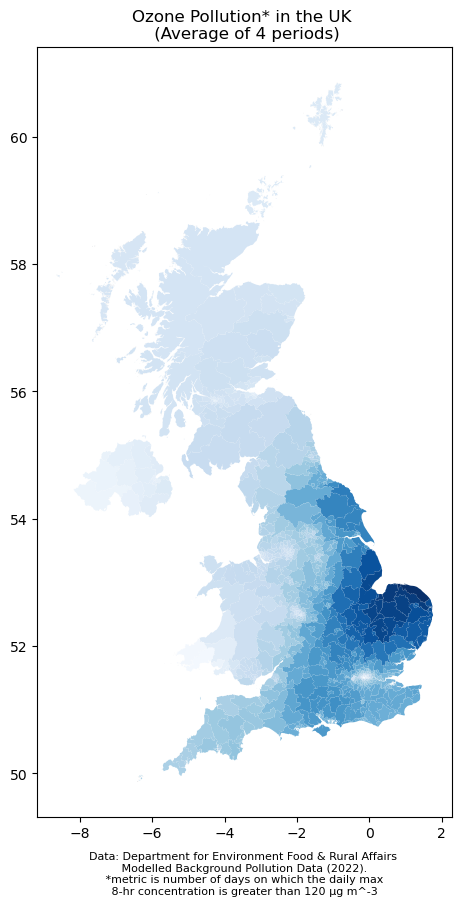

In [24]:
pollution_map_oz_avg = shp_cons.merge(oz_averages, on='pcn20cd')

# Plot the joined data with the variable of interest as the fill color
pollution_map_oz_avg.plot(column='avg_value', cmap='Blues')

# Add title and axis labels
plt.title('Ozone Pollution* in the UK \n (Average of 4 periods)')


# Add bottom text
plt.text(0.5, -0.1, 'Data: Department for Environment Food & Rural Affairs \n Modelled Background Pollution Data (2022). \n *metric is number of days on which the daily max \n 8-hr concentration is greater than 120 µg m^-3 ', ha='center',fontsize=8, transform=plt.gca().transAxes)
plt.rcParams['figure.dpi'] = 100

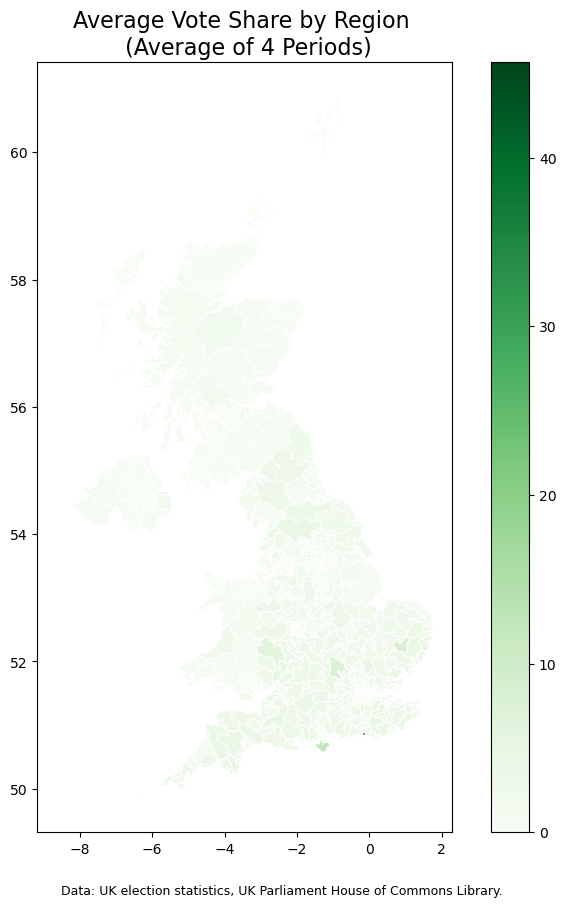

In [11]:
votes_avg_map = shp_cons.merge(vote_averages, on='pcn20cd')


# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))
votes_avg_map.plot(column='voteShare', cmap="Greens", ax=ax, linewidth=0.5, edgecolor='white')

# Add a title and legend
ax.set_title('Average Vote Share by Region \n (Average of 4 Periods)', fontsize=16)
vmin, vmax = votes_avg_map['voteShare'].min(), votes_avg_map['voteShare'].max()
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, ax=ax)
plt.text(0.6, -0.08, 'Data: UK election statistics, UK Parliament House of Commons Library.  ', ha='center',fontsize=9, transform=plt.gca().transAxes)
# Show the plot
plt.show()

In [12]:
mean_vote_2010 = green2010['voteShare'].mean()
mean_vote_2015 = green2015['voteShare'].mean()
mean_vote_2017 = green2017['voteShare'].mean()
mean_vote_2019 = green2019['voteShare'].mean()

mean_pm10_2010 = pm10_2010['avg_value'].mean()
mean_pm10_2015 = pm10_2015['avg_value'].mean()
mean_pm10_2017 = pm10_2017['avg_value'].mean()
mean_pm10_2019 = pm10_2019['avg_value'].mean()

data = {'Year': ['2010', '2015', '2017', '2019'],
        'Average Green Vote': [mean_vote_2010, mean_vote_2015, mean_vote_2017, mean_vote_2019],
        'Average PM 10': [mean_pm10_2010, mean_pm10_2015, mean_pm10_2017, mean_pm10_2019]}
df = pd.DataFrame(data)

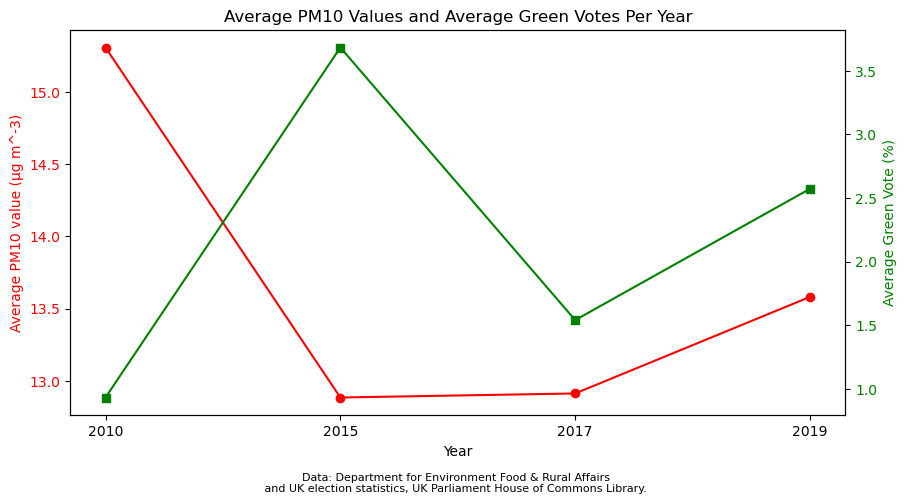

In [13]:


# Create the figure and axes objects
fig, ax1 = plt.subplots()

# Add a second y-axis to the plot
ax2 = ax1.twinx()

# Plot the first data series
ax1.plot(df['Year'], df['Average PM 10'], marker='o', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM10 value (µg m^-3)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Plot the second data series
ax2.plot(df['Year'], df['Average Green Vote'], marker='s', color='green')
ax2.set_ylabel('Average Green Vote (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title
plt.title('Average PM10 Values and Average Green Votes Per Year')
# Add bottom text
plt.text(0.5, -0.2, 'Data: Department for Environment Food & Rural Affairs \n and UK election statistics, UK Parliament House of Commons Library.  ', ha='center',fontsize=8, transform=plt.gca().transAxes)
# Show the plot
plt.show()
